# Building Machine Learning Pipelines: Data Analysis Phase

## All the Lifecycle In A Data Science Projects
1.Data Analysis
2.Feature Engineering
3.Feature Selection
4.Model Building
5.Model Deployment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Display all the columns of the dataset
pd.pandas.set_option("display.max_columns",None)

In [2]:
claim=pd.read_csv('Auto_Insurance_claims_amount.csv')
## print shape of dataset with rows and columns
print(claim.shape)

(9134, 26)


In [3]:
claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
claim.tail()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large
9133,Y167826,US,MO,Missouri,261.183687,No,Extended,College,2/14/11,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Other,Call Center,369.600000,Two-Door Car,Medsize


In [5]:
claim.shape

(9134, 26)

In [6]:
claim.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [7]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State Code                       9134 non-null object
State                            9134 non-null object
Claim Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception  

In [8]:
claim.skew()

Claim Amount                     3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
dtype: float64

In [9]:
claim.var()

Claim Amount                     4.721020e+05
Income                           9.229386e+08
Monthly Premium Auto             1.183908e+03
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Total Claim Amount               8.439030e+04
dtype: float64

In [10]:
claim.describe()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [11]:
claim.corr()

,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Claim Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


## work on DateTime

In [12]:
# list of variables that contain year information
year_feature = [feature for feature in claim.columns if 'Date' in feature ]

year_feature

['Effective To Date']

In [13]:
## We will be using logarithmic transformation
for feature in year_feature:
    data=claim.copy()
    
data['Effective To Date'] = pd.to_datetime(data['Effective To Date'])

In [14]:
data.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [15]:
data.dtypes

Customer                                 object
Country                                  object
State Code                               object
State                                    object
Claim Amount                            float64
Response                                 object
Coverage                                 object
Education                                object
Effective To Date                datetime64[ns]
EmploymentStatus                         object
Gender                                   object
Income                                    int64
Location Code                            object
Marital Status                           object
Monthly Premium Auto                      int64
Months Since Last Claim                   int64
Months Since Policy Inception             int64
Number of Open Complaints                 int64
Number of Policies                        int64
Policy Type                              object
Policy                                  

In [16]:
(data['Effective To Date']).dt.weekday_name.head()

0    Thursday
1      Monday
2    Saturday
3    Thursday
4    Thursday
Name: Effective To Date, dtype: object

In [17]:
(data['Effective To Date']).dt.dayofyear.head()

0    55
1    31
2    50
3    20
4    34
Name: Effective To Date, dtype: int64

### In Data Analysis We will Analyze To Find out the below stuff¶
1.Missing Values
2.All The Numerical Variables
3.Distribution of the Numerical Variables
4.Categorical Variables
5.Cardinality of Categorical Variables
6.Outliers
7.Relationship between independent and dependent feature(Total Claim Amount)

## Missing Values

In [18]:
# ## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in claim.columns if claim[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(claim[feature].isnull().mean(), 4),  ' % missing values')

## Numerical Variables

In [19]:
numerical_features=[feature for feature in claim.columns if claim[feature].dtypes!='O']

print("Number of Numerical Variables:", len(numerical_features))

#Visiulize all the numerical variables
claim[numerical_features].head()

Number of Numerical Variables: 8


,Claim Amount,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,276.351928,56274,69,32,5,0,1,384.811147
1,697.953590,0,94,13,42,0,8,1131.464935
2,1288.743165,48767,108,18,38,0,2,566.472247
3,764.586183,0,106,18,65,0,7,529.881344
4,281.369258,43836,73,12,44,0,1,138.130879


In [20]:
## Numerical Feature are usually are 2 types
## 1 Continuous variable and Discrete variabls

discrete_features=[feature for feature in numerical_features if len(claim[feature].unique())<25]
print("Discrete Variables Counts:{}".format(len(discrete_features)))

Discrete Variables Counts:2


In [21]:
discrete_features

['Number of Open Complaints', 'Number of Policies']

In [22]:
claim[discrete_features].head()

,Number of Open Complaints,Number of Policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1


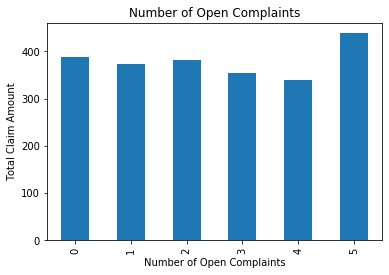

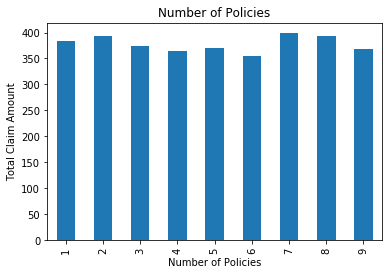

In [23]:
## lets find the realationship between them and total claim price
for feature in discrete_features:
    data=claim.copy()
    data.groupby(feature)['Total Claim Amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Total Claim Amount')
    plt.title(feature)
    plt.show()

In [24]:
## There is a relationship between variable number and Total Claim Amount

### Continuous Variable

In [25]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_features]
print("Continuous feature Counts:{}".format(len(continuous_feature)))


Continuous feature Counts:6


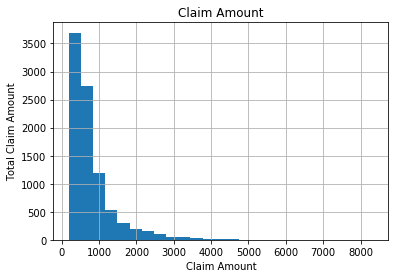

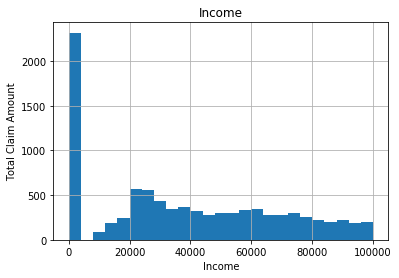

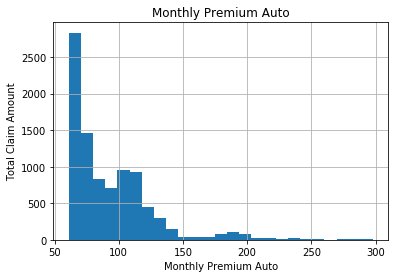

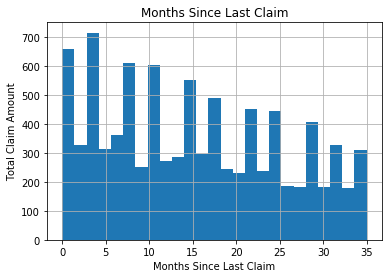

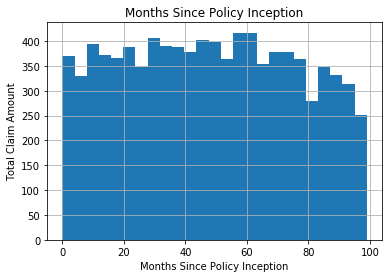

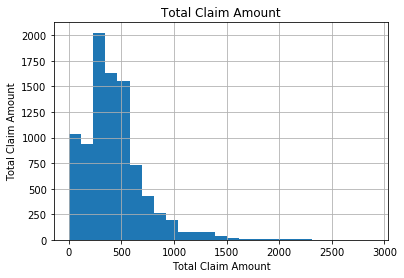

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=claim.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Total Claim Amount')
    plt.title(feature)
    plt.show()

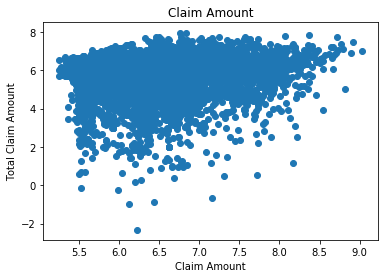

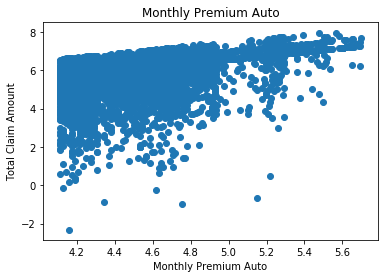

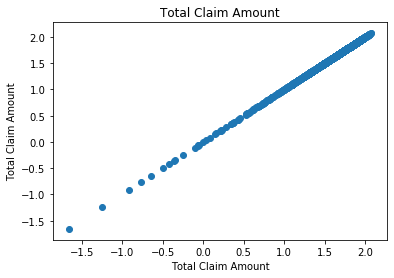

In [27]:
## We will be using logarithmic transformation
for feature in continuous_feature:
    data=claim.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Total Claim Amount']=np.log(data['Total Claim Amount'])
        plt.scatter(data[feature],data['Total Claim Amount'])
        plt.xlabel(feature)
        plt.ylabel('Total Claim Amount')
        plt.title(feature)
        plt.show()

### Outliers

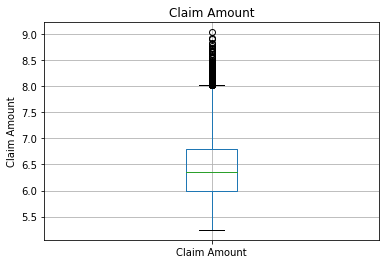

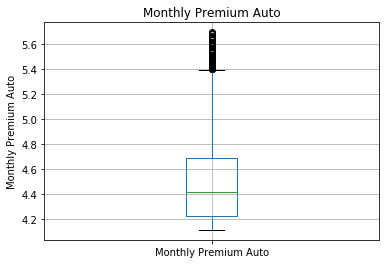

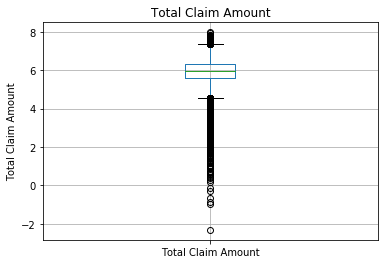

In [28]:
for feature in continuous_feature:
    data=claim.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Categorical Variables

In [29]:
categorical_features=[feature for feature in claim.columns if claim[feature].dtypes=='O']
categorical_features

['Customer',
 'Country',
 'State Code',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [30]:
claim[categorical_features].head()

,Customer,Country,State Code,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Collision,Agent,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Scratch/Dent,Agent,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Collision,Agent,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Collision,Call Center,SUV,Medsize
4,HB64268,US,KS,Kansas,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Collision,Agent,Four-Door Car,Medsize


In [31]:
for feature in categorical_features:
    print("The feature {} and number of categories are {}".format(feature,len(claim[feature].unique())))

The feature Customer and number of categories are 9134
The feature Country and number of categories are 1
The feature State Code and number of categories are 5
The feature State and number of categories are 5
The feature Response and number of categories are 2
The feature Coverage and number of categories are 3
The feature Education and number of categories are 5
The feature Effective To Date and number of categories are 59
The feature EmploymentStatus and number of categories are 5
The feature Gender and number of categories are 2
The feature Location Code and number of categories are 3
The feature Marital Status and number of categories are 3
The feature Policy Type and number of categories are 3
The feature Policy and number of categories are 9
The feature Claim Reason and number of categories are 4
The feature Sales Channel and number of categories are 4
The feature Vehicle Class and number of categories are 6
The feature Vehicle Size and number of categories are 3


In [32]:
## Find out the relationship between categorical variable and dependent feature Total Claim Amount

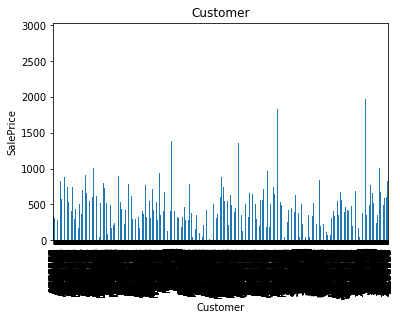

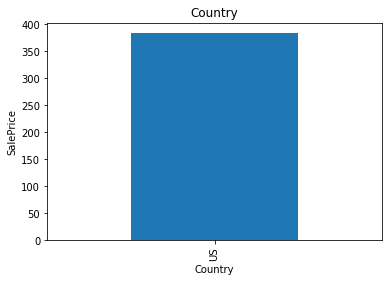

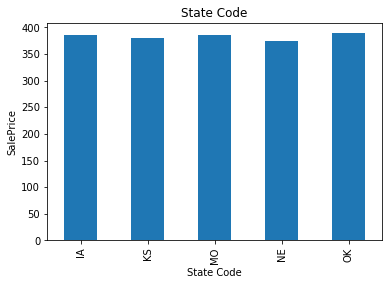

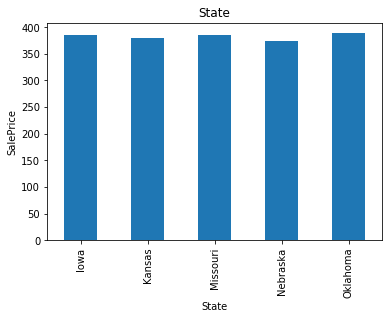

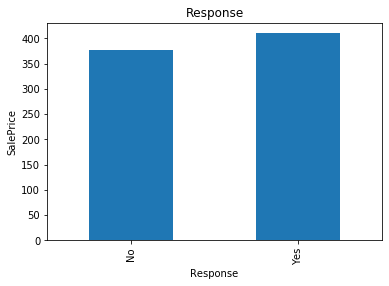

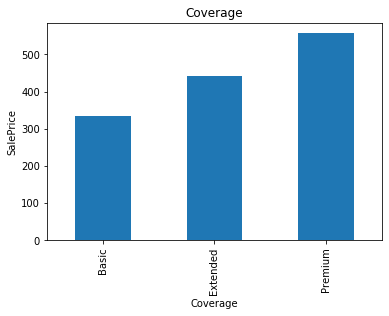

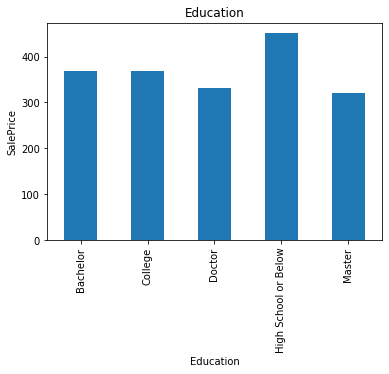

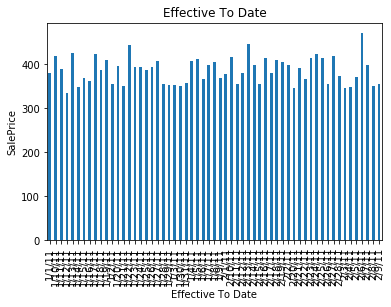

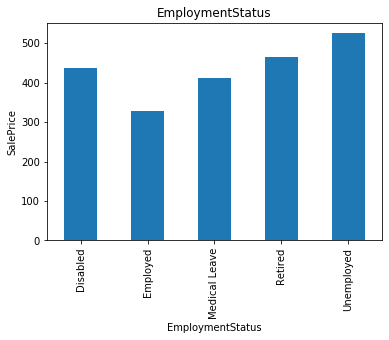

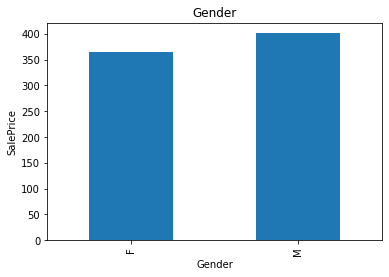

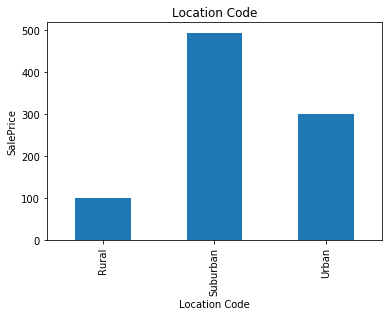

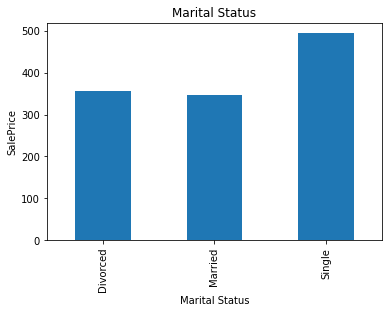

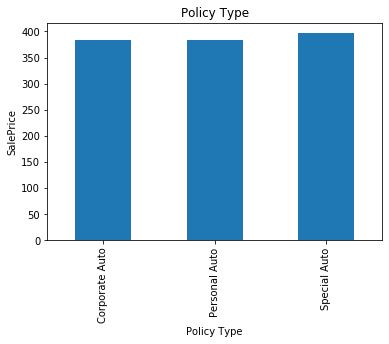

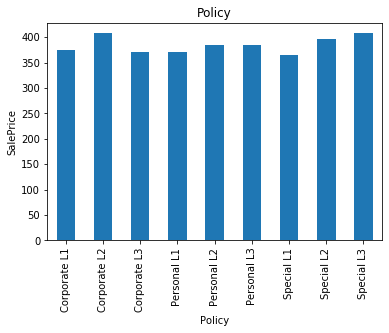

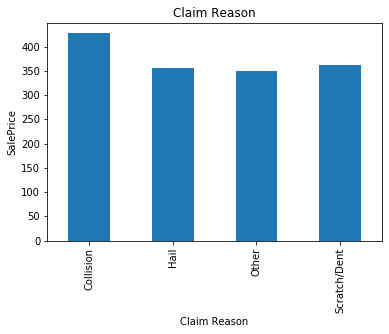

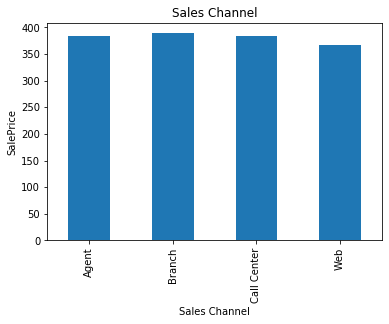

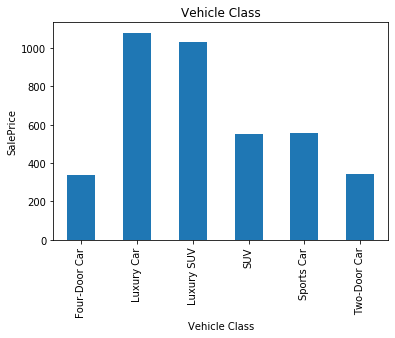

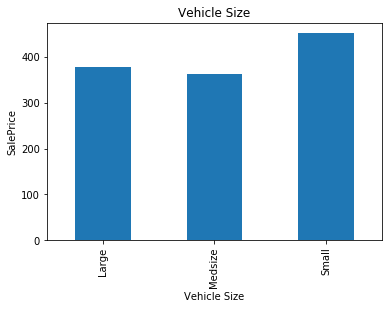

In [33]:
for feature in categorical_features:
    data=claim.copy()
    data.groupby(feature)['Total Claim Amount'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Temporal Variables(Eg: Datetime Variables)
From the Dataset we have 1 date variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the Total Claim Amount was built and the year the.

In [34]:
# list of variables that contain year information. We will be performing this analysis in the Feature Engineering which is the next video.
year_feature = [feature for feature in claim.columns if 'Date' in feature ]

year_feature

['Effective To Date']

In [35]:

# let's explore the content of these year variables
for feature in year_feature:
    print(feature, claim[feature].unique())


Effective To Date ['2/24/11' '1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/13/11'
 '1/30/11' '2/22/11' '1/7/11']


Text(0.5, 1.0, 'Auto Insurance claims vs Total Claim Amount')

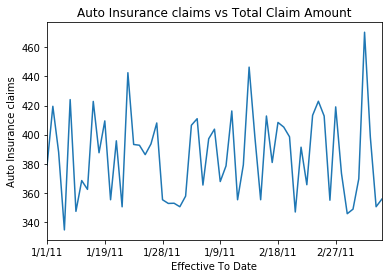

In [36]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

claim.groupby('Effective To Date')['Total Claim Amount'].median().plot()
plt.xlabel('Effective To Date')
plt.ylabel('Auto Insurance claims')
plt.title("Auto Insurance claims vs Total Claim Amount")

# Feature Engineering

 We will be performing all the below steps in Feature Engineering

1.Missing values
2.Categorical variables: remove rare labels
3.Standarise the values of the variables to the same range

In [37]:
## Replace 0 with nan
claim[['Income']]=claim[['Income']].replace(0,np.nan)
claim[['Months Since Last Claim']]=claim[['Months Since Last Claim']].replace(0,np.nan)
claim[['Months Since Policy Inception']]=claim[['Months Since Policy Inception']].replace(0,np.nan)
claim[['Number of Open Complaints']]=claim[['Number of Open Complaints']].replace(0,np.nan)


In [38]:
claim.isnull().sum()

Customer                            0
Country                             0
State Code                          0
State                               0
Claim Amount                        0
Response                            0
Coverage                            0
Education                           0
Effective To Date                   0
EmploymentStatus                    0
Gender                              0
Income                           2317
Location Code                       0
Marital Status                      0
Monthly Premium Auto                0
Months Since Last Claim           314
Months Since Policy Inception      83
Number of Open Complaints        7252
Number of Policies                  0
Policy Type                         0
Policy                              0
Claim Reason                        0
Sales Channel                       0
Total Claim Amount                  0
Vehicle Class                       0
Vehicle Size                        0
dtype: int64

In [39]:

## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in claim.columns if claim[feature].isnull().sum()>1 and claim[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(claim[feature].isnull().mean(),4)))

In [40]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in claim.columns if claim[feature].isnull().sum()>1 and claim[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(claim[feature].isnull().mean(),4)))

Income: 0.2537% missing value
Months Since Last Claim: 0.0344% missing value
Months Since Policy Inception: 0.0091% missing value
Number of Open Complaints: 0.794% missing value


In [41]:
## Replace the numerical Missing values
for feature in numerical_with_nan:
    ## We will replace by usnig median since there are outliers
    median_value=claim[feature].median()
    
    ## create a new feature to capture nan values
    claim[feature+'nan']=np.where(claim[feature].isnull(),1,0)
    claim[feature].fillna(median_value,inplace=True)
    
claim[numerical_with_nan].isnull().sum()    

Income                           0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
dtype: int64

In [42]:
claim.head(20)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,69,32.0,5.0,1.0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,0,0,1
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,48081.0,Suburban,Single,94,13.0,42.0,1.0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1,0,0,1
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767.0,Suburban,Married,108,18.0,38.0,1.0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0,0,0,1
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,48081.0,Suburban,Married,106,18.0,65.0,1.0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,1,0,0,1
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836.0,Rural,Single,73,12.0,44.0,1.0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0,0,0,1
5,OC83172,US,IA,Iowa,825.629780,Yes,Basic,Bachelor,1/25/11,Employed,F,62902.0,Rural,Married,69,14.0,94.0,1.0,2,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize,0,0,0,1
6,XZ87318,US,IA,Iowa,538.089864,Yes,Basic,College,2/24/11,Employed,F,55350.0,Suburban,Married,67,15.0,13.0,1.0,9,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize,0,1,0,1
7,CF85061,US,NE,Nebraska,721.610031,No,Premium,Master,1/18/11,Unemployed,M,48081.0,Urban,Single,101,15.0,68.0,1.0,4,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize,1,1,0,1
8,DY87989,US,IA,Iowa,2412.750402,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072.0,Suburban,Divorced,71,13.0,3.0,1.0,2,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize,0,0,0,1
9,BQ94931,US,IA,Iowa,738.817808,No,Extended,College,2/17/11,Employed,F,28812.0,Urban,Married,93,17.0,7.0,1.0,8,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize,0,0,0,1


## Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [43]:
claim.head(2)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274.0,Suburban,Married,69,32.0,5.0,1.0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,0,0,1
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,48081.0,Suburban,Single,94,13.0,42.0,1.0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1,0,0,1


In [44]:
num_features=['Claim Amount','Income','Monthly Premium Auto','Months Since Last Claim','Months Since Policy Inception',
            'Number of Open Complaints','Number of Policies']
for feature in num_features:
    claim[feature]=np.log(claim[feature])

In [45]:
claim.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,BU79786,US,KS,Kansas,5.621675,No,Basic,Bachelor,2/24/11,Employed,F,10.937988,Suburban,Married,4.234107,3.465736,1.609438,0.0,0.000000,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,0,0,1
1,QZ44356,US,NE,Nebraska,6.548153,No,Extended,Bachelor,1/31/11,Unemployed,F,10.780642,Suburban,Single,4.543295,2.564949,3.737670,0.0,2.079442,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1,0,0,1
2,AI49188,US,OK,Oklahoma,7.161423,No,Premium,Bachelor,2/19/11,Employed,F,10.794809,Suburban,Married,4.682131,2.890372,3.637586,0.0,0.693147,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0,0,0,1
3,WW63253,US,MO,Missouri,6.639335,No,Basic,Bachelor,1/20/11,Unemployed,M,10.780642,Suburban,Married,4.663439,2.890372,4.174387,0.0,1.945910,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,1,0,0,1
4,HB64268,US,KS,Kansas,5.639668,No,Basic,Bachelor,2/3/11,Employed,M,10.688211,Rural,Single,4.290459,2.484907,3.784190,0.0,0.000000,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0,0,0,1


## Handling Rare Categorical Feature

In [46]:
categorical_features=[feature for feature in claim.columns if claim[feature].dtype=='O']
categorical_features

['Customer',
 'Country',
 'State Code',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Claim Reason',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

In [47]:
for feature in categorical_features:
    temp=claim.groupby(feature)['Total Claim Amount'].count()/len(claim)
    temp_df=temp[temp>0.01].index
    claim[feature]=np.where(claim[feature].isin(temp_df),claim[feature],'Rare_var')

In [48]:
claim.head(100)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,Rare_var,US,KS,Kansas,5.621675,No,Basic,Bachelor,2/24/11,Employed,F,10.937988,Suburban,Married,4.234107,3.465736,1.609438,0.000000,0.000000,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize,0,0,0,1
1,Rare_var,US,NE,Nebraska,6.548153,No,Extended,Bachelor,1/31/11,Unemployed,F,10.780642,Suburban,Single,4.543295,2.564949,3.737670,0.000000,2.079442,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize,1,0,0,1
2,Rare_var,US,OK,Oklahoma,7.161423,No,Premium,Bachelor,2/19/11,Employed,F,10.794809,Suburban,Married,4.682131,2.890372,3.637586,0.000000,0.693147,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize,0,0,0,1
3,Rare_var,US,MO,Missouri,6.639335,No,Basic,Bachelor,1/20/11,Unemployed,M,10.780642,Suburban,Married,4.663439,2.890372,4.174387,0.000000,1.945910,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize,1,0,0,1
4,Rare_var,US,KS,Kansas,5.639668,No,Basic,Bachelor,2/3/11,Employed,M,10.688211,Rural,Single,4.290459,2.484907,3.784190,0.000000,0.000000,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize,0,0,0,1
5,Rare_var,US,IA,Iowa,6.716146,Yes,Basic,Bachelor,1/25/11,Employed,F,11.049333,Rural,Married,4.234107,2.639057,4.543295,0.000000,0.693147,Personal Auto,Personal L3,Hail,Web,159.383042,Two-Door Car,Medsize,0,0,0,1
6,Rare_var,US,IA,Iowa,6.288026,Yes,Basic,College,2/24/11,Employed,F,10.921432,Suburban,Married,4.204693,2.708050,2.564949,0.000000,2.197225,Corporate Auto,Corporate L3,Collision,Agent,321.600000,Four-Door Car,Medsize,0,1,0,1
7,Rare_var,US,NE,Nebraska,6.581485,No,Premium,Master,1/18/11,Unemployed,M,10.780642,Urban,Single,4.615121,2.708050,4.219508,0.000000,1.386294,Corporate Auto,Corporate L3,Collision,Agent,363.029680,Four-Door Car,Medsize,1,1,0,1
8,Rare_var,US,IA,Iowa,7.788523,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,9.551942,Suburban,Divorced,4.262680,2.564949,1.098612,0.000000,0.693147,Corporate Auto,Corporate L3,Collision,Agent,511.200000,Four-Door Car,Medsize,0,0,0,1
9,Rare_var,US,IA,Iowa,6.605051,No,Extended,College,2/17/11,Employed,F,10.268547,Urban,Married,4.532599,2.833213,1.945910,0.000000,2.079442,Special Auto,Special L2,Hail,Branch,425.527834,Four-Door Car,Medsize,0,0,0,1


In [49]:
for feature in categorical_features:
    labels_ordered=claim.groupby([feature])['Total Claim Amount'].mean().sort_values().index
    labels_ordered={k:i for i, k in enumerate(labels_ordered,0)}
    claim[feature]=claim[feature].map(labels_ordered)

In [50]:
claim.head(10)

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,0,0,2,2,5.621675,0,0,3,12,0,0,10.937988,2,0,4.234107,3.465736,1.609438,0.0,0.000000,0,0,3,3,384.811147,0,0,0,0,0,1
1,0,0,0,0,6.548153,0,1,3,6,4,0,10.780642,2,2,4.543295,2.564949,3.737670,0.0,2.079442,1,2,2,3,1131.464935,1,0,1,0,0,1
2,0,0,4,4,7.161423,0,2,3,38,0,0,10.794809,2,0,4.682131,2.890372,3.637586,0.0,0.693147,1,2,3,3,566.472247,0,0,0,0,0,1
3,0,0,3,3,6.639335,0,0,3,21,4,1,10.780642,2,0,4.663439,2.890372,4.174387,0.0,1.945910,0,6,3,0,529.881344,3,0,1,0,0,1
4,0,0,2,2,5.639668,0,0,3,1,0,1,10.688211,0,2,4.290459,2.484907,3.784190,0.0,0.000000,1,7,3,3,138.130879,1,0,0,0,0,1
5,0,0,1,1,6.716146,1,0,3,4,0,0,11.049333,0,0,4.234107,2.639057,4.543295,0.0,0.693147,1,2,1,2,159.383042,0,0,0,0,0,1
6,0,0,1,1,6.288026,1,0,2,12,0,0,10.921432,2,0,4.204693,2.708050,2.564949,0.0,2.197225,0,0,3,3,321.600000,1,0,0,1,0,1
7,0,0,0,0,6.581485,0,2,1,30,4,1,10.780642,1,2,4.615121,2.708050,4.219508,0.0,1.386294,0,0,3,3,363.029680,1,0,1,1,0,1
8,0,0,1,1,7.788523,1,0,3,41,1,1,9.551942,2,1,4.262680,2.564949,1.098612,0.0,0.693147,0,0,3,3,511.200000,1,0,0,0,0,1
9,0,0,1,1,6.605051,0,1,2,40,0,0,10.268547,1,0,4.532599,2.833213,1.945910,0.0,2.079442,2,1,1,1,425.527834,1,0,0,0,0,1


# Feature Scaling

In [51]:
feature_scale=[feature for feature in claim.columns if feature not in ['Total Claim Amount']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(claim[feature_scale])

MinMaxScaler(copy=True, feature_range=(0, 1))

In [52]:
scaler.transform(claim[feature_scale])

array([[0.  , 0.  , 0.5 , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 0.75, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.75, ..., 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.75, ..., 0.  , 0.  , 1.  ]])

In [53]:
# transform the train and test set, and add on the Total Claim Amount
data =  pd.concat([claim[['Total Claim Amount']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(claim[feature_scale]),columns=feature_scale)],axis=1)

In [54]:
data.head()

,Total Claim Amount,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,384.811147,0.0,0.0,0.50,0.50,0.099340,0.0,0.0,0.75,0.206897,0.0,0.0,0.749969,1.0,0.0,0.077690,0.974795,0.350249,0.0,0.000000,0.0,0.000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1131.464935,0.0,0.0,0.00,0.00,0.344314,0.0,0.5,0.75,0.103448,1.0,0.0,0.681519,1.0,1.0,0.272611,0.721434,0.813400,0.0,0.946395,0.5,0.250,0.666667,1.0,0.2,0.0,1.0,0.0,0.0,1.0
2,566.472247,0.0,0.0,1.00,1.00,0.506471,0.0,1.0,0.75,0.655172,0.0,0.0,0.687682,1.0,0.0,0.360138,0.812964,0.791619,0.0,0.315465,0.5,0.250,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,529.881344,0.0,0.0,0.75,0.75,0.368424,0.0,0.0,0.75,0.362069,1.0,1.0,0.681519,1.0,0.0,0.348354,0.812964,0.908439,0.0,0.885622,0.0,0.750,1.000000,0.0,0.6,0.0,1.0,0.0,0.0,1.0
4,138.130879,0.0,0.0,0.50,0.50,0.104098,0.0,0.0,0.75,0.017241,0.0,1.0,0.641309,0.0,1.0,0.113216,0.698921,0.823524,0.0,0.000000,0.5,0.875,1.000000,1.0,0.2,0.0,0.0,0.0,0.0,1.0


# Feature Selection

In [55]:
## for feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [56]:
## Capture the dependent feature
y=data[['Total Claim Amount']]

In [57]:
##drop independent feature from dataset
dx=data.drop(['Total Claim Amount'],axis=1)

In [58]:
### Apply feature Selection
# first, I  specify the Lasso Regression model, and I
# select the suitable aplhp(equivalent of penalty).
# The bigger the alpha the less feature that will selected.

## The I use the selectFromModel object from sklearn,which
# will select the feature coefficients are non-zero
feature_sel_model= SelectFromModel(Lasso(alpha=0.005,random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(dx,y)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [59]:
feature_sel_model.get_support()

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [60]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = dx.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((dx.shape[1])))
print('selected features: {}'.format(len(selected_feat)))


total features: 29
selected features: 26


In [61]:
selected_feat

Index(['State Code', 'Claim Amount', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Income',
       'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Claim Reason', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size', 'Incomenan', 'Months Since Last Claimnan',
       'Months Since Policy Inceptionnan', 'Number of Open Complaintsnan'],
      dtype='object')

In [62]:
X=dx[selected_feat]

In [63]:
X.shape

(9134, 26)

In [64]:
X.head()

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Vehicle Class,Vehicle Size,Incomenan,Months Since Last Claimnan,Months Since Policy Inceptionnan,Number of Open Complaintsnan
0,0.50,0.099340,0.0,0.0,0.75,0.206897,0.0,0.0,0.749969,1.0,0.0,0.077690,0.974795,0.350249,0.0,0.000000,0.0,0.000,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.00,0.344314,0.0,0.5,0.75,0.103448,1.0,0.0,0.681519,1.0,1.0,0.272611,0.721434,0.813400,0.0,0.946395,0.5,0.250,0.666667,1.0,0.2,0.0,1.0,0.0,0.0,1.0
2,1.00,0.506471,0.0,1.0,0.75,0.655172,0.0,0.0,0.687682,1.0,0.0,0.360138,0.812964,0.791619,0.0,0.315465,0.5,0.250,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.75,0.368424,0.0,0.0,0.75,0.362069,1.0,1.0,0.681519,1.0,0.0,0.348354,0.812964,0.908439,0.0,0.885622,0.0,0.750,1.000000,0.0,0.6,0.0,1.0,0.0,0.0,1.0
4,0.50,0.104098,0.0,0.0,0.75,0.017241,0.0,1.0,0.641309,0.0,1.0,0.113216,0.698921,0.823524,0.0,0.000000,0.5,0.875,1.000000,1.0,0.2,0.0,0.0,0.0,0.0,1.0


In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=30,test_size=0.2)

In [66]:
X_train.shape,X_test.shape

((7307, 26), (1827, 26))

In [83]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.7592892739184073

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [68]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.72981479, 0.75394779, 0.75035924, 0.74604928, 0.75011552])

In [69]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [70]:
dt.score(X_test,y_test)

0.7029422843678136

In [71]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(DecisionTreeRegressor(),X,y,cv=cv)

array([0.69429071, 0.70317267, 0.68907703, 0.67713502, 0.67182288])

In [72]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7084940276908727

### Use K Fold cross validation to measure accuracy of our KNeighborsRegressor model

In [73]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(KNeighborsRegressor(),X,y,cv=cv)

array([0.67079106, 0.69275723, 0.67010876, 0.69358618, 0.70308665])

In [74]:
from sklearn.ensemble import RandomForestRegressor
rf=KNeighborsRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7084940276908727

In [75]:
from sklearn.svm import SVR
sv= SVR(kernel='poly', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, 
        cache_size=200, verbose=False, max_iter=-1)
sv.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [76]:
sv.score(X_test,y_test)

0.7920656644746344

### Find best model using GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1,10,100,1000], 'kernel':['linear']},
              {'C': [1,10,100,1000],'kernel':['rbf'],'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}]
grid_search= GridSearchCV(estimator = sv,
                         param_grid=parameters,
                         scoring ='r2',
                         cv=10,
                         n_jobs = -1)
grid_search =grid_search.fit(X_train,y_train)

In [78]:
accuracy =grid_search.best_score_

In [79]:
grid_search.best_params_

{'C': 1000, 'gamma': 0.2, 'kernel': 'rbf'}

#### Based on above results we can say SVR gives the best score. Hence we will use that.

## Export the tested model to a pickle file

In [84]:
import pickle
with open('auto_Insurence_model.pickle','wb') as f:
    pickle.dump(sv,f)